<a href="https://colab.research.google.com/github/soumendra375/DEEP-LEARNING/blob/master/DL_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
mnist

<module 'keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/keras/datasets/mnist.py'>

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(train_images[4].shape)

(28, 28)


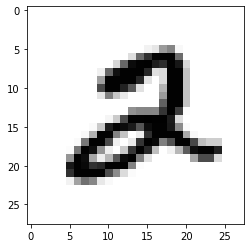

Label = 2


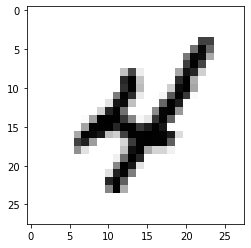

Label = 4


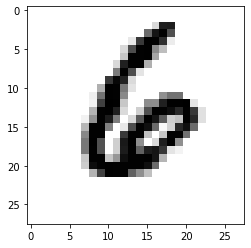

Label = 6


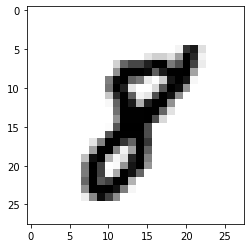

Label = 8


In [0]:
for i in range(5, 20, 4):
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.show()
    print('Label = ' + str(train_labels[i]))

In [0]:
print(train_images.shape, train_labels.shape)
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28) (60000,)
(60000, 784)
float32


In [0]:
print(test_images.shape, test_labels.shape)
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255
print(test_images.shape)

(10000, 28, 28) (10000,)
(10000, 784)


In [0]:
print(train_labels[5:,])

[2 1 3 ... 5 6 8]


In [0]:
train_labels = ku.to_categorical(train_labels)
print(train_labels[5:,])

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [0]:
test_labels = ku.to_categorical(test_labels)

In [0]:
nn = models.Sequential()
nn.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nn.add(layers.Dense(10, activation = 'softmax'))

In [0]:
nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
nn.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 5s 89us/step - loss: 0.2615 - acc: 0.9238
Epoch 2/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.1062 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0708 - acc: 0.9785
Epoch 4/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.0516 - acc: 0.9841
Epoch 5/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.0397 - acc: 0.9878


Notice that the loss declines and the accuracy increases with each training epoch. However, since neural networks tend to be overfit, these improved figures may or may not indicate that the model is actually getting better. Keep in mind that the model may simple be learning the training data.

It is necessary to test the model on independent data set. The evaluate method allows you to do just this.Execute the code in the cell below and compair the results to training results.

---



---



In [0]:
nn.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 51us/step


[0.07166502535903128, 0.9791]

It is clear that the model is over-fit since the evaluation loss and accuracy are quite a bit worse than observed in training.

In [0]:
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',
            metrics = ['accuracy'])
history = nnt.fit(train_images, train_labels,
                  epochs = 15, batch_size = 128,
                  validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 84us/step - loss: 0.2662 - acc: 0.9223 - val_loss: 0.1407 - val_acc: 0.9572
Epoch 2/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.1101 - acc: 0.9673 - val_loss: 0.0995 - val_acc: 0.9666
Epoch 3/15
60000/60000 [==============================] - 5s 80us/step - loss: 0.0726 - acc: 0.9781 - val_loss: 0.0797 - val_acc: 0.9746
Epoch 4/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.0530 - acc: 0.9839 - val_loss: 0.0751 - val_acc: 0.9782
Epoch 5/15
60000/60000 [==============================] - 5s 84us/step - loss: 0.0405 - acc: 0.9877 - val_loss: 0.0675 - val_acc: 0.9802
Epoch 6/15
60000/60000 [==============================] - 5s 84us/step - loss: 0.0311 - acc: 0.9907 - val_loss: 0.0785 - val_acc: 0.9762
Epoch 7/15
60000/60000 [==============================] - 5s 82us/step - loss: 0.0238 - acc: 0.9930 - val_loss: 0.0683 - val_acc

To aid in understanding these figures it will help to make some plots comparing the training and evaluation performance as the training epochs evolve. The code in the next two cells does this is a somewhat primitive manner. The Numpy array is manually adited to include the training loass and training accuracy.
The plot_loss and plot_performance functions in the next two cell plot the training loss or accuracy in blue and the test loss or accuracy in red. Execute the code and examine the plots.

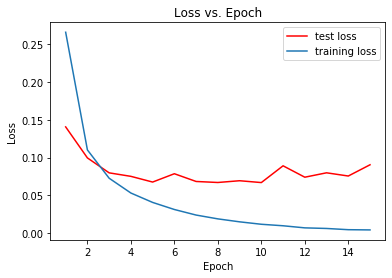

In [0]:
def plot_loss(history):
  train_loss = history.history['loss']
  test_loss = history.history['val_loss']
  x = list(range(1, len(test_loss) + 1))
  plt.plot(x, test_loss, color = 'red', label = 'test loss')
  plt.plot(x, train_loss, label = 'training loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Loss vs. Epoch')
  plt.legend()

plot_loss(history)

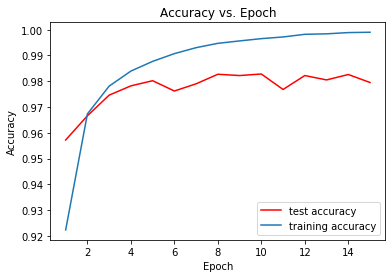

In [0]:
def plot_accuracy(history):
  train_acc = history.history['acc']
  test_acc = history.history['val_acc']
  x = list(range(1, len(test_acc) + 1))
  plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
  plt.plot(x, train_acc, label = 'training accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Accuracy vs. Epoch')
  plt.legend(loc='lower right')

plot_accuracy(history)

Notice that the training loss and accuracy continue to improve throughout the epochs. However, the evaluation loss and accuracy only improve significantly for the first four, or perhaps 5, epochs. This is clear evidence that subsequent epochs are simply over-fitting the model.

In [0]:
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ),
                     kernel_regularizer=regularizers.l2(0.01)))#
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = nnt.fit(train_images, train_labels,
                  epochs = 10, batch_size = 128,
                  validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.9290 - acc: 0.8848 - val_loss: 0.4553 - val_acc: 0.9178
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.4366 - acc: 0.9188 - val_loss: 0.5536 - val_acc: 0.8717
Epoch 3/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.3897 - acc: 0.9294 - val_loss: 0.3802 - val_acc: 0.9318
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3623 - acc: 0.9346 - val_loss: 0.5654 - val_acc: 0.8682
Epoch 5/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3439 - acc: 0.9387 - val_loss: 0.3071 - val_acc: 0.9473
Epoch 6/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.3283 - acc: 0.9426 - val_loss: 0.2997 - val_acc: 0.9532
Epoch 7/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.3157 - acc: 0.9450 - val_loss: 0.2904 - val_acc

Once again, we can best understand these results by creating plots of the loss and accuracy for training and evaluation vs. epoch. Execute the code in the two cells below to display these plots and study the results.

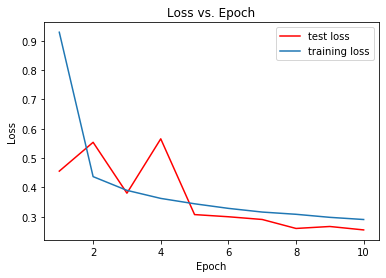

In [0]:
plot_loss(history)

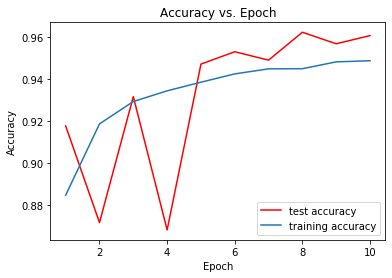

In [0]:
plot_accuracy(history)